In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [7]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1622,spam,U have a secret admirer who is looking 2 make ...,NaN,NaN,NaN
883,ham,Dude we should go sup again,NaN,NaN,NaN
630,ham,Please dont say like that. Hi hi hi,NaN,NaN,NaN
443,ham,"Sorry, I'll call later",NaN,NaN,NaN
3672,ham,Moji just informed me that you saved our lives...,NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

## Datacleaning

In [10]:
df.info()     #to see info about last 3 cols  ----> we can see last 3 cols are not imp ans first 2 cols contains the classification

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [13]:
#drop last three cols
df.drop(columns = ['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'], inplace=True) #permanently delete so inplace

In [14]:
df.sample(5)

,v1,v2
1069,ham,Jus finish bathing...
831,ham,Hi mate its RV did u hav a nice hol just a mes...
4991,ham,I'm hungry buy smth home...
2789,ham,When you are big..| God will bring success.
4888,ham,"Japanese Proverb: If one Can do it, U too Can ..."


In [17]:
df.rename(columns = {'v1':'Target', 'v2':'Message'}, inplace=True)
df.sample(5)

,Target,Message
291,ham,Haf u found him? I feel so stupid da v cam was...
1543,spam,Hello from Orange. For 1 month's free access t...
1414,ham,So wats ur opinion abt him and how abt is char...
384,spam,Double mins and txts 4 6months FREE Bluetooth ...
935,ham,Then dun wear jeans lor...


In [18]:
#converting ham = 0 spam=1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [21]:
df['Target'] = encoder.fit_transform(df['Target'])

In [26]:
df.sample(5)
df.head()

,Target,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
#missing vallues
df.isnull().sum()

Target     0
Message    0
dtype: int64

In [29]:
#duplicate values
df.duplicated().sum()

403

In [31]:
df=df.drop_duplicates(keep='first')

In [32]:
df.duplicated().sum()

0

In [34]:
df.shape


(5169, 2)

## Exploratory Data Analysis


In [35]:
#total count of spam and notspam 
df['Target'].value_counts()


Target
0    4516
1     653
Name: count, dtype: int64

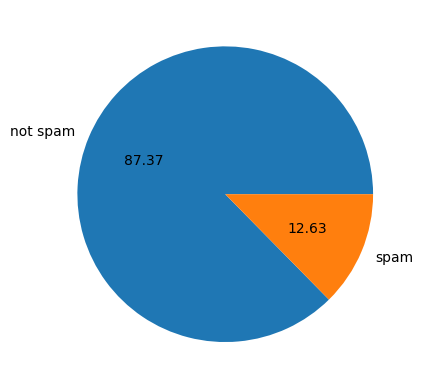

In [39]:
#representing this count using chart
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels=['not spam', 'spam'], autopct='%0.2f')
plt.show()

In [ ]:
#Data is imbalanced too much not spam less spam


In [40]:
!pip install nltk

     ---------------------------------------- 1.5/1.5 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 269.5/269.5 KB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 78.3/78.3 KB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 97.9/97.9 KB 1.4 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\Anushka Chillal\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [41]:
import nltk

In [42]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Anushka
[nltk_data]     Chillal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [45]:
df['num_char'] = df['Message'].apply(len)

In [46]:
df.head()

,Target,Message,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [51]:
# fetch no of words
df['num_words']=df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [52]:
df['num_sentence']=df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [53]:
df.head()

,Target,Message,num_char,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [57]:
df[['num_char', 'num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [58]:
#analysing notspam and spam separately
df[df['Target'] ==0][['num_char','num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [59]:
df[df['Target'] ==1][['num_char','num_words','num_sentence']].describe()

,num_char,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [60]:
import seaborn as sns


<Axes: xlabel='num_char', ylabel='Count'>

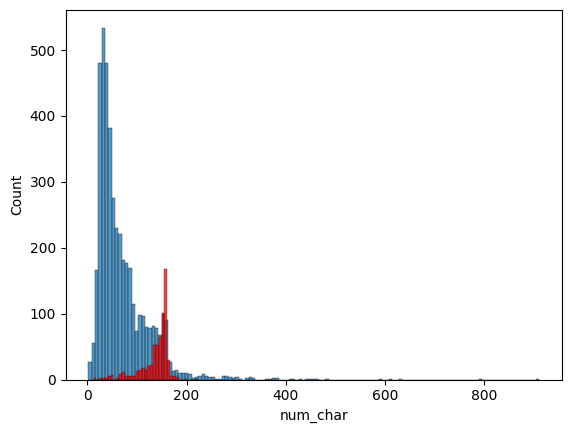

In [62]:
sns.histplot(df[df['Target']==0]['num_char'])
sns.histplot(df[df['Target']==1]['num_char'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

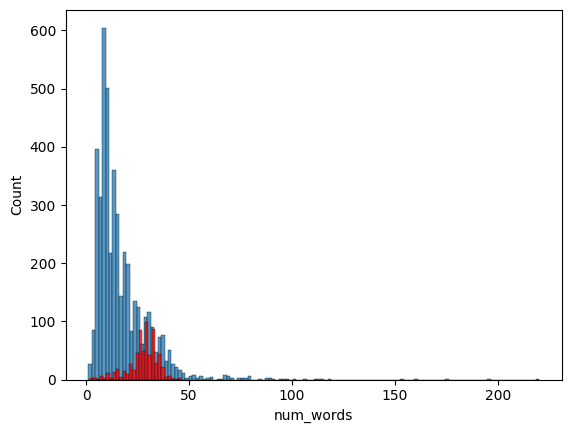

In [63]:
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentence', ylabel='Count'>

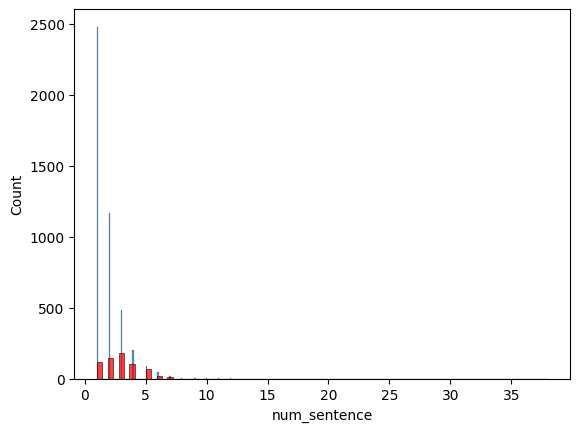

In [64]:
sns.histplot(df[df['Target']==0]['num_sentence'])
sns.histplot(df[df['Target']==1]['num_sentence'],color='red')

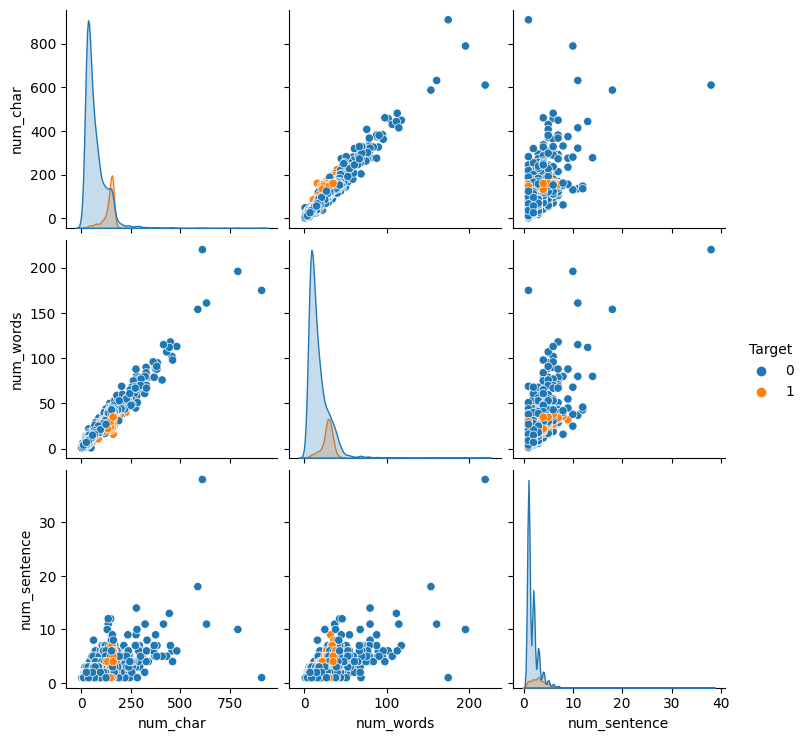

In [65]:
# relation between these cols
sns.pairplot(df,hue='Target')

<Axes: >

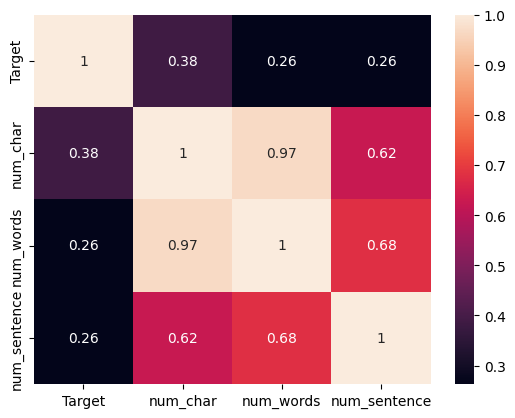

In [68]:
#deciding what col to use for model building using correlation
numeric_columns = df.select_dtypes(include=['float64', 'int64','int32']).columns
sns.heatmap(df[numeric_columns].corr(), annot=True)

## DATA PREPROCESSING

In [93]:
#CREATING  FUNCTION TO TRANSFORM TXT TO LOWER CASE, TOKENIZATION, REMOVING SPECIAL CHAR STOPWORDS PUNCTUATION AND STEMMING
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]  #u need to clone coz list are mutable
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
            

    
    return " ".join(y)
    

In [87]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()

In [94]:
transform_text('Hi, HOw are You? loving')

'hi love'

In [96]:
df['transformed_msg']=df['Message'].apply(transform_text)


In [97]:
df.head()

,Target,Message,num_char,num_words,num_sentence,transformed_msg
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [108]:
!pip install wordcloud

You should consider upgrading via the 'C:\Users\Anushka Chillal\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [112]:

from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10,background_color='white')

In [113]:
spam_wc = wc.generate(df[df['Target'] ==1]['transformed_msg'].str.cat(sep=" " ))

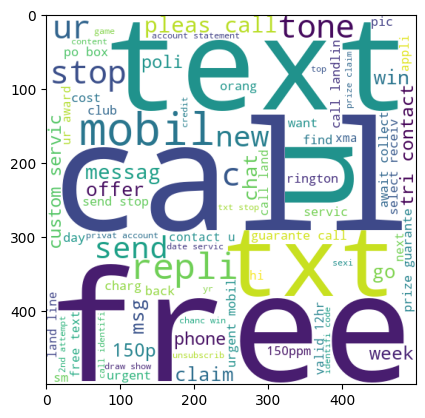

In [114]:
plt.imshow(spam_wc)

In [116]:
ham_wc = wc.generate(df[df['Target'] ==0]['transformed_msg'].str.cat(sep=" " ))

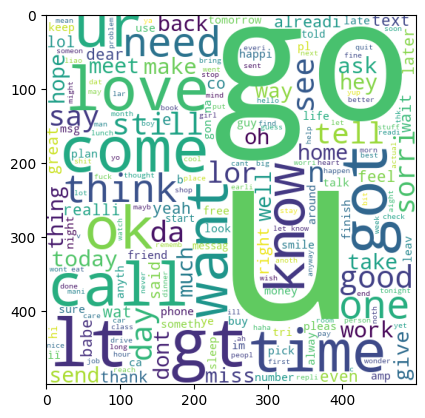

In [117]:
plt.imshow(ham_wc)

In [122]:
spam_corpus =[]
for msg in df[df['Target'] == 1]['transformed_msg'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [123]:
len(spam_corpus)

9939

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'u'),
  Text(6, 0, 'ur'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'tone'),
  Text(17, 0, 'send'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'nokia'),
  Text(20, 0, 'contact'),
  Text(21, 0, 'award'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'c'),
  Text(28, 0, 'collect'),
  Text(29, 0, 'min')])

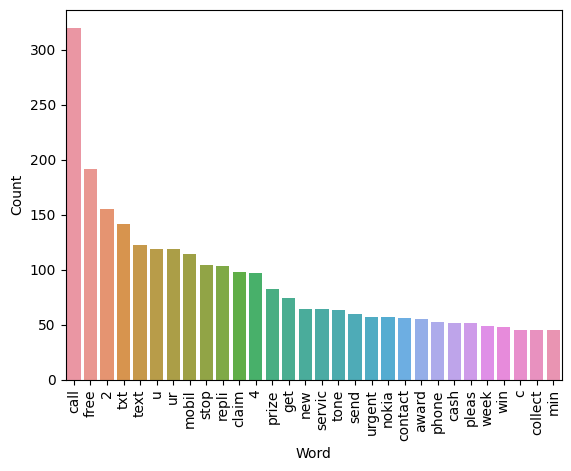

In [132]:
counter_result = Counter(spam_corpus)

# Create a DataFrame from the Counter result
df_counter = pd.DataFrame(counter_result.most_common(30), columns=['Word', 'Count'])

# Create a bar plot using seaborn
sns.barplot(x='Word', y='Count', data=df_counter)
plt.xticks(rotation='vertical')

In [135]:
ham_corpus =[]
for msg in df[df['Target'] == 0]['transformed_msg'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [136]:
len(ham_corpus)

35404

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, 'gt'),
  Text(4, 0, 'lt'),
  Text(5, 0, '2'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'time'),
  Text(12, 0, 'ok'),
  Text(13, 0, 'love'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'need'),
  Text(19, 0, 'one'),
  Text(20, 0, 'lor'),
  Text(21, 0, '4'),
  Text(22, 0, 'home'),
  Text(23, 0, 'think'),
  Text(24, 0, 'see'),
  Text(25, 0, 'take'),
  Text(26, 0, 'still'),
  Text(27, 0, 'da'),
  Text(28, 0, 'tell'),
  Text(29, 0, 'make')])

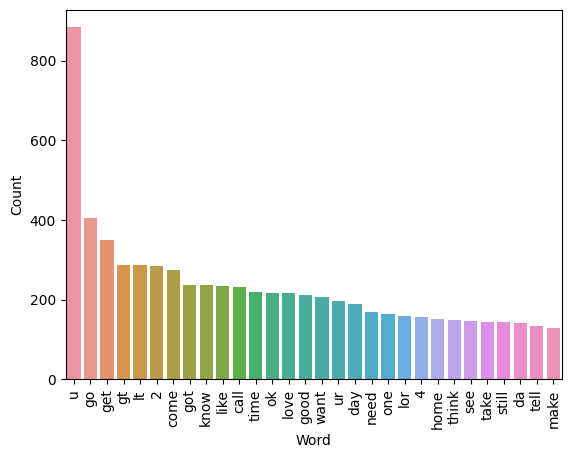

In [137]:
counter_result1 = Counter(ham_corpus)

# Create a DataFrame from the Counter result
df_counter1 = pd.DataFrame(counter_result1.most_common(30), columns=['Word', 'Count'])

# Create a bar plot using seaborn
sns.barplot(x='Word', y='Count', data=df_counter1)
plt.xticks(rotation='vertical')

# MODEL BUILDING
## NAIVE BAYES

In [ ]:
#we will start with bag of words coz input need must be numerical
#Data will be vectorize using bag of words


In [226]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [227]:
X = tfidf.fit_transform(df['transformed_msg']).toarray()


In [228]:
X.shape

(5169, 3000)

In [229]:
y = df['Target'].values

In [230]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [231]:
from sklearn.model_selection import train_test_split


In [232]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [233]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [234]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [235]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test) 
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))



0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [236]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test) 
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))



0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [237]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test) 
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))



0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [238]:
#tfidf --> MNB


In [240]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))

In [241]:
%ls

 Volume in drive C is Windows
 Volume Serial Number is 3AE1-5CA1

 Directory of C:\Users\Anushka Chillal\Desktop\New folder\spam classifier

17-01-2024  20:55    <DIR>          .
11-01-2024  12:32    <DIR>          ..
11-01-2024  13:03    <DIR>          .ipynb_checkpoints
17-01-2024  20:54            96,605 model.pkl
11-01-2024  12:38           503,663 spam.csv
17-01-2024  20:55           778,710 spam_detection.ipynb
17-01-2024  20:54           160,664 vectorizer.pkl
               4 File(s)      1,539,642 bytes
               3 Dir(s)  293,774,868,480 bytes free
